In [1]:
from accelerator_environments.wrappers import NormalizeAction, NormalizeObservation, ScaleReward, ScaleActuators
from accelerator_environments.utils import unwrap
from gym.wrappers import TimeLimit

from environments.simulation import ARESEAJOSS

initializing ocelot...


In [2]:
env = ARESEAJOSS()
env = TimeLimit(env, max_episode_steps=50)
env = NormalizeAction(env)
env = NormalizeObservation(env)
env = ScaleReward(env, unwrap(env).observation_space.high[:4].sum() * 1e-3)
env

<ScaleReward<NormalizeObservation<NormalizeAction<TimeLimit<ARESEAJOSS instance>>>>>

In [3]:
env.observation_space.low, env.observation_space.high

(array([-1., -1.,  0.,  0.,  0., -1., -1., -1., -1., -1.], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [4]:
env.reset()

array([-0.13047738,  0.82384854,  2.27357207,  0.34684842,  0.25405   ,
        0.0956562 , -0.58404636, -0.22438533,  0.9433915 , -0.7085513 ])

In [5]:
env.target

array([ 0.00111413, -0.00047857,  0.00045448,  0.00034538])

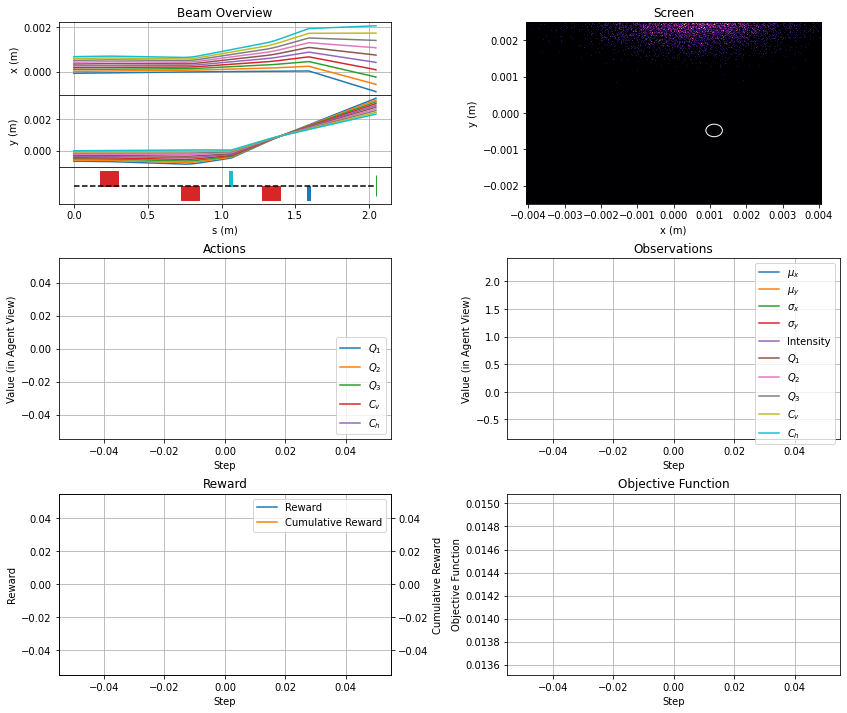

In [6]:
env.render()

[-0.13753749  0.88806324  2.2171604   0.28141984]	22.98429	False
[-0.09963387  0.87182722  2.5234487   0.26586349]	-107.54195	False
[-0.05631455  0.83076524  3.18668499  0.36875664]	-309.88547	False
[-0.14848708  0.89830928  2.12600338  0.20228583]	485.19804	False
[-0.07279905  0.92678652  2.80420676  0.54073423]	-440.65494	False
[-0.18798013  0.82420073  1.88833903  0.17622129]	576.26601	False
[-0.21286281  0.83094815  1.57598024  0.0700932 ]	175.84396	False
[-0.08192956  0.85147181  3.13069676  0.24902059]	-737.83368	False
[-0.11267366  0.82723378  2.7293039   0.49153245]	69.26132	False
[-0.13493185  0.84551804  2.18795864  0.44766432]	247.57768	False


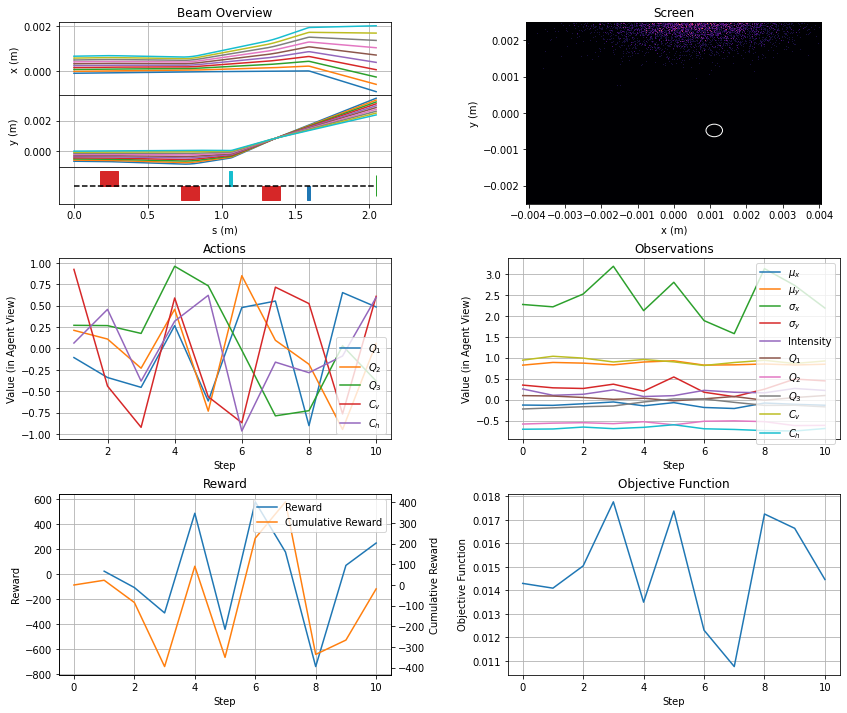

In [7]:
for _ in range(10):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(f"{observation[:4]}\t{reward:.5f}\t{done}")

env.render()

In [8]:
env.reset()
env.beam_parameters

array([-0.00074412, -0.00750673, -0.00040203,  0.00427621])

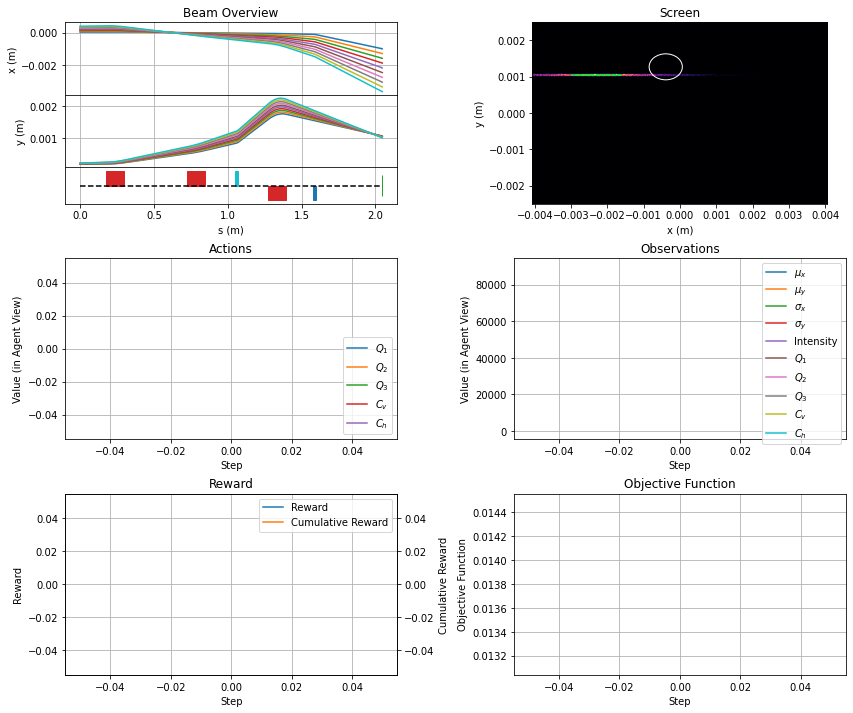

      fun: 0.01354909442399231
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.25922231e-04,  1.36847824e-04,  3.25300549e-05,  7.07501572e-01,
       -4.50000000e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 234
      nit: 4
     njev: 39
   status: 0
  success: True
        x: array([ 9.99999168e-01,  9.99999293e-01,  9.99999850e-01,  7.87403276e-04,
       -1.72044362e-03])


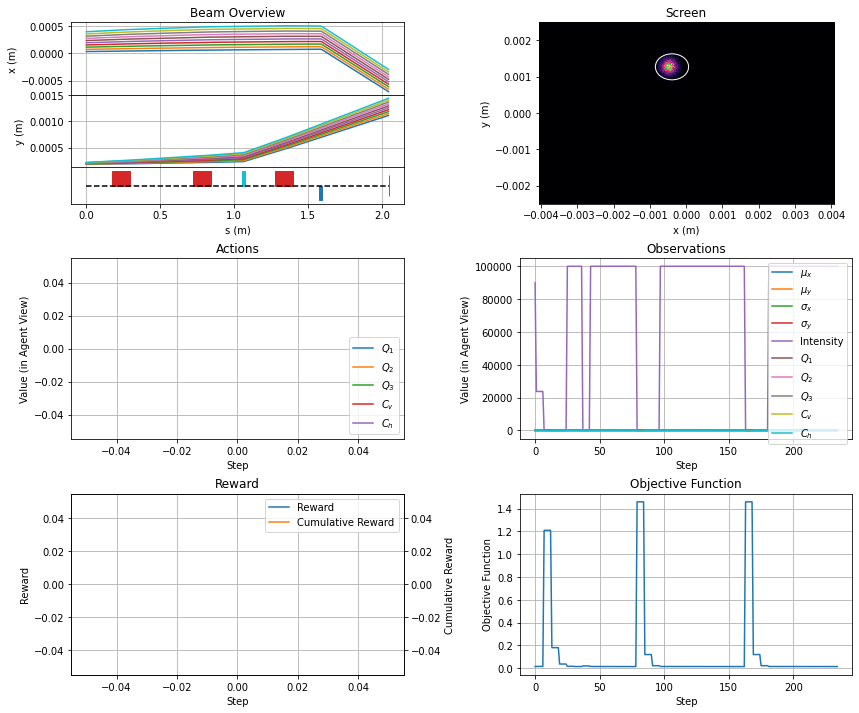

In [9]:
from scipy import optimize

env = ARESEAJOSS()
env = ScaleActuators(env, env.optimization_space.high)
env.reset()

env.render()
bounds = optimize.Bounds(env.optimization_space.low, env.optimization_space.high)
x = optimize.minimize(fun=env.evaluate,
                      x0=env.initial_actuators,
                      bounds=bounds)
print(x)
env.render()

In [10]:
env.beam_parameters

array([-9.75054913e-05, -1.45174802e-09, -7.71380050e-04, -5.73778248e-04])

In [11]:
env.actuators

array([ 9.99999168e-01,  9.99999293e-01,  9.99999850e-01,  7.87403276e-04,
       -1.72043362e-03])

In [12]:
bounds

Bounds(array([-1., -1., -1., -1., -1.], dtype=float32), array([1., 1., 1., 1., 1.], dtype=float32))

In [13]:
env.observation_space.high

array([4.e-03, 4.e-03, 4.e-04, 4.e-04, 1.e+05, 3.e+01, 3.e+01, 3.e+01,
       3.e-03, 3.e-03], dtype=float32)